In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./data_files/subwaytime.csv', encoding='euckr')

In [12]:
df.head(2)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,...,33149,19442,3612,7167,0,410,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   사용월                598 non-null    object 
 1   호선명                598 non-null    object 
 2   역ID                598 non-null    float64
 3   지하철역               598 non-null    object 
 4   04:00:00~04:59:59  599 non-null    object 
 5   Unnamed: 5         599 non-null    object 
 6   05:00:00~05:59:59  599 non-null    object 
 7   Unnamed: 7         599 non-null    object 
 8   06:00:00~06:59:59  599 non-null    object 
 9   Unnamed: 9         599 non-null    object 
 10  07:00:00~07:59:59  599 non-null    object 
 11  Unnamed: 11        599 non-null    object 
 12  08:00:00~08:59:59  599 non-null    object 
 13  Unnamed: 13        599 non-null    object 
 14  09:00:00~09:59:59  599 non-null    object 
 15  Unnamed: 15        599 non-null    object 
 16  10:00:00~10:59:59  599 non

In [13]:
df.drop(['사용월', '역ID'], axis=1, inplace=True)

In [14]:
df.head()

,호선명,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,07:00:00~07:59:59,Unnamed: 11,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,승차,하차,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,1호선,서울역,927,22,10682,8774,13504,45545,39110,103863,...,33149,19442,3612,7167,0,410,0,0,0,0
2,1호선,시청,74,0,2409,4049,3532,19241,7703,66876,...,14478,4079,981,1256,3,29,0,0,0,0
3,1호선,종각,100,8,4409,5105,4593,26969,6733,104259,...,54264,5560,4886,1722,0,0,0,0,0,0
4,1호선,종로3가,122,4,5061,2520,3876,12832,6066,29381,...,25970,5503,3214,2471,0,52,0,0,0,0


In [15]:
df.iloc[:,-8:]

,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,승차,하차,승차,하차,승차,하차,승차,하차
1,3612,7167,0,410,0,0,0,0
2,981,1256,3,29,0,0,0,0
3,4886,1722,0,0,0,0,0,0
4,3214,2471,0,52,0,0,0,0
...,...,...,...,...,...,...,...,...
594,450,1940,0,0,0,0,0,0
595,287,1133,0,0,0,0,0,0
596,648,662,0,0,0,0,0,0
597,135,456,0,1,0,0,0,0


In [17]:
df.iloc[:,2:-8]

,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,...,19:00:00~19:59:59,Unnamed: 35,20:00:00~20:59:59,Unnamed: 37,21:00:00~21:59:59,Unnamed: 39,22:00:00~22:59:59,Unnamed: 41,23:00:00~23:59:59,Unnamed: 43
0,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,927,22,10682,8774,13504,45545,39110,103863,80492,236747,...,142575,77807,97729,55056,96955,46680,70982,35481,33149,19442
2,74,0,2409,4049,3532,19241,7703,66876,9978,209349,...,76142,15634,57394,9141,58745,8204,38156,6345,14478,4079
3,100,8,4409,5105,4593,26969,6733,104259,11028,300081,...,134259,51603,113555,19039,135586,12188,111743,8286,54264,5560
4,122,4,5061,2520,3876,12832,6066,29381,9735,84155,...,95225,37346,68613,14242,76067,10422,62004,7761,25970,5503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,5,3,1907,561,6026,2270,20034,3613,23966,7142,...,5727,18482,3596,11747,3164,10684,2412,9988,1450,6536
595,3,0,1508,625,4799,1809,12345,2999,14421,5144,...,4398,12582,2767,7761,2642,6912,1778,6250,869,3595
596,2,0,769,281,1172,931,3373,3424,6730,8021,...,6987,9495,6234,4863,7200,4105,6686,3293,3149,2152
597,0,0,407,190,770,928,1868,2159,3949,5117,...,2759,3100,1930,2037,1528,2087,1351,1872,575,1179


In [36]:
temp_df = pd.concat([df.iloc[:,-8:], df.iloc[:,2:-8]], axis=1)

In [37]:
temp_df

,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,04:00:00~04:59:59,Unnamed: 5,...,19:00:00~19:59:59,Unnamed: 35,20:00:00~20:59:59,Unnamed: 37,21:00:00~21:59:59,Unnamed: 39,22:00:00~22:59:59,Unnamed: 41,23:00:00~23:59:59,Unnamed: 43
0,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,3612,7167,0,410,0,0,0,0,927,22,...,142575,77807,97729,55056,96955,46680,70982,35481,33149,19442
2,981,1256,3,29,0,0,0,0,74,0,...,76142,15634,57394,9141,58745,8204,38156,6345,14478,4079
3,4886,1722,0,0,0,0,0,0,100,8,...,134259,51603,113555,19039,135586,12188,111743,8286,54264,5560
4,3214,2471,0,52,0,0,0,0,122,4,...,95225,37346,68613,14242,76067,10422,62004,7761,25970,5503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,450,1940,0,0,0,0,0,0,5,3,...,5727,18482,3596,11747,3164,10684,2412,9988,1450,6536
595,287,1133,0,0,0,0,0,0,3,0,...,4398,12582,2767,7761,2642,6912,1778,6250,869,3595
596,648,662,0,0,0,0,0,0,2,0,...,6987,9495,6234,4863,7200,4105,6686,3293,3149,2152
597,135,456,0,1,0,0,0,0,0,0,...,2759,3100,1930,2037,1528,2087,1351,1872,575,1179


In [39]:
temp = []
for i in range(24):
    for j in ['승', '하']:
        temp.append((str(i)+ j))
    
temp

['0승',
 '0하',
 '1승',
 '1하',
 '2승',
 '2하',
 '3승',
 '3하',
 '4승',
 '4하',
 '5승',
 '5하',
 '6승',
 '6하',
 '7승',
 '7하',
 '8승',
 '8하',
 '9승',
 '9하',
 '10승',
 '10하',
 '11승',
 '11하',
 '12승',
 '12하',
 '13승',
 '13하',
 '14승',
 '14하',
 '15승',
 '15하',
 '16승',
 '16하',
 '17승',
 '17하',
 '18승',
 '18하',
 '19승',
 '19하',
 '20승',
 '20하',
 '21승',
 '21하',
 '22승',
 '22하',
 '23승',
 '23하']

In [40]:
temp_df.columns = temp
temp_df

,0승,0하,1승,1하,2승,2하,3승,3하,4승,4하,...,19승,19하,20승,20하,21승,21하,22승,22하,23승,23하
0,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,3612,7167,0,410,0,0,0,0,927,22,...,142575,77807,97729,55056,96955,46680,70982,35481,33149,19442
2,981,1256,3,29,0,0,0,0,74,0,...,76142,15634,57394,9141,58745,8204,38156,6345,14478,4079
3,4886,1722,0,0,0,0,0,0,100,8,...,134259,51603,113555,19039,135586,12188,111743,8286,54264,5560
4,3214,2471,0,52,0,0,0,0,122,4,...,95225,37346,68613,14242,76067,10422,62004,7761,25970,5503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,450,1940,0,0,0,0,0,0,5,3,...,5727,18482,3596,11747,3164,10684,2412,9988,1450,6536
595,287,1133,0,0,0,0,0,0,3,0,...,4398,12582,2767,7761,2642,6912,1778,6250,869,3595
596,648,662,0,0,0,0,0,0,2,0,...,6987,9495,6234,4863,7200,4105,6686,3293,3149,2152
597,135,456,0,1,0,0,0,0,0,0,...,2759,3100,1930,2037,1528,2087,1351,1872,575,1179


In [41]:
mdf = pd.concat([df.iloc[:, :2], temp_df], axis=1)
mdf.drop(0, inplace=True)

In [47]:
for c in mdf.columns[2:]:
    mdf[c] = pd.to_numeric(mdf[c], errors='coerce')
    

In [48]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 1 to 598
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호선명     598 non-null    object
 1   지하철역    598 non-null    object
 2   0승      598 non-null    int64 
 3   0하      598 non-null    int64 
 4   1승      598 non-null    int64 
 5   1하      598 non-null    int64 
 6   2승      598 non-null    int64 
 7   2하      598 non-null    int64 
 8   3승      598 non-null    int64 
 9   3하      598 non-null    int64 
 10  4승      598 non-null    int64 
 11  4하      598 non-null    int64 
 12  5승      598 non-null    int64 
 13  5하      598 non-null    int64 
 14  6승      598 non-null    int64 
 15  6하      598 non-null    int64 
 16  7승      598 non-null    int64 
 17  7하      598 non-null    int64 
 18  8승      598 non-null    int64 
 19  8하      598 non-null    int64 
 20  9승      598 non-null    int64 
 21  9하      598 non-null    int64 
 22  10승     598 non-null    in

In [54]:

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [ ]:
# 신림역의 시간대별 승차 인원을 bar chart로 표현하시오..

<AxesSubplot:>

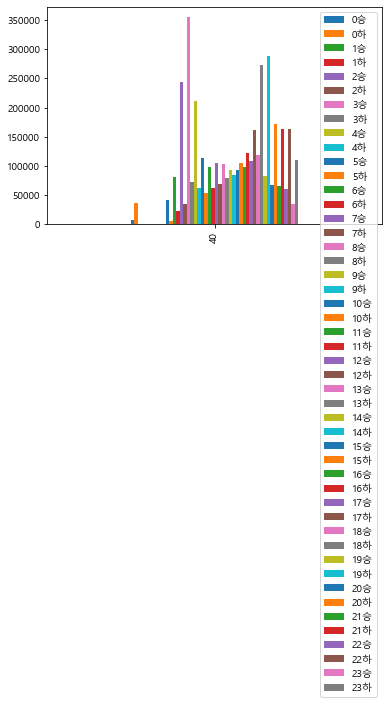

In [55]:
mdf[mdf['지하철역']  == '신림'].plot(kind='bar')

<BarContainer object of 48 artists>

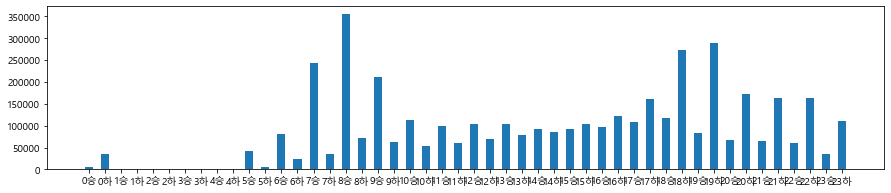

In [70]:
plt.figure(figsize=(15,3))
plt.bar(mdf.columns[2:], mdf[mdf['지하철역']  == '신림'].values[0][2:], width=0.5)

In [ ]:
# 출근 시간 승차인원, 하차인원이 가장 많은 역을 각각 찾으시오..(7~9)

In [72]:
mdf.head(2)

,호선명,지하철역,0승,0하,1승,1하,2승,2하,3승,3하,...,19승,19하,20승,20하,21승,21하,22승,22하,23승,23하
1,1호선,서울역,3612,7167,0,410,0,0,0,0,...,142575,77807,97729,55056,96955,46680,70982,35481,33149,19442
2,1호선,시청,981,1256,3,29,0,0,0,0,...,76142,15634,57394,9141,58745,8204,38156,6345,14478,4079


In [86]:
cmdf = mdf.loc[:, '7승':'9하']
scmdf = cmdf.iloc[:, 0:7:2]
scms = scmdf.sum(axis=1)
scms.index = mdf.지하철역
scms.sort_values(ascending=False).iloc[:1]

지하철역
신림    809541
dtype: int64

In [92]:
hcmdf = cmdf.iloc[:, 1:7:2]
hcms = hcmdf.sum(axis=1)
hcms.index = mdf.지하철역
hcms.sort_values(ascending=False).iloc[:1]

지하철역
강남    984427
dtype: int64

In [9]:
# 사용자 인구 상위 10개 역의 이용자수를 bar chart로 표현하시오..

In [98]:
sms = mdf.iloc[:, 2:].sum(axis=1)
sms.index = mdf.지하철역
sms.sort_values(ascending=False).iloc[:1]

지하철역
강남    6718007
dtype: int64

In [ ]:
# 시간대별 이용자 데이터를 box chart로 표현하시오..

In [137]:
temp_df = mdf.iloc[:, 2:]
temp_df.head()

,0승,0하,1승,1하,2승,2하,3승,3하,4승,4하,...,19승,19하,20승,20하,21승,21하,22승,22하,23승,23하
1,3612,7167,0,410,0,0,0,0,927,22,...,142575,77807,97729,55056,96955,46680,70982,35481,33149,19442
2,981,1256,3,29,0,0,0,0,74,0,...,76142,15634,57394,9141,58745,8204,38156,6345,14478,4079
3,4886,1722,0,0,0,0,0,0,100,8,...,134259,51603,113555,19039,135586,12188,111743,8286,54264,5560
4,3214,2471,0,52,0,0,0,0,122,4,...,95225,37346,68613,14242,76067,10422,62004,7761,25970,5503
5,785,980,1,3,0,0,0,0,43,2,...,72550,24744,49690,10816,40800,7410,32727,5112,12013,3450


In [138]:
temp_l = []
for i in temp_df.columns:
    temp_l.append(str(i[:-1]) + '시')
    
temp_l

['0시',
 '0시',
 '1시',
 '1시',
 '2시',
 '2시',
 '3시',
 '3시',
 '4시',
 '4시',
 '5시',
 '5시',
 '6시',
 '6시',
 '7시',
 '7시',
 '8시',
 '8시',
 '9시',
 '9시',
 '10시',
 '10시',
 '11시',
 '11시',
 '12시',
 '12시',
 '13시',
 '13시',
 '14시',
 '14시',
 '15시',
 '15시',
 '16시',
 '16시',
 '17시',
 '17시',
 '18시',
 '18시',
 '19시',
 '19시',
 '20시',
 '20시',
 '21시',
 '21시',
 '22시',
 '22시',
 '23시',
 '23시']

In [139]:
temp_df.columns = temp_l

In [153]:
temp_df.head()

,0시,0시,1시,1시,2시,2시,3시,3시,4시,4시,...,19시,19시,20시,20시,21시,21시,22시,22시,23시,23시
1,3612,7167,0,410,0,0,0,0,927,22,...,142575,77807,97729,55056,96955,46680,70982,35481,33149,19442
2,981,1256,3,29,0,0,0,0,74,0,...,76142,15634,57394,9141,58745,8204,38156,6345,14478,4079
3,4886,1722,0,0,0,0,0,0,100,8,...,134259,51603,113555,19039,135586,12188,111743,8286,54264,5560
4,3214,2471,0,52,0,0,0,0,122,4,...,95225,37346,68613,14242,76067,10422,62004,7761,25970,5503
5,785,980,1,3,0,0,0,0,43,2,...,72550,24744,49690,10816,40800,7410,32727,5112,12013,3450


In [140]:
temp_df2 = temp_df.T
temp_df2.head()

,1,2,3,4,5,6,7,8,9,10,...,589,590,591,592,593,594,595,596,597,598
0시,3612,981,4886,3214,785,1071,593,258,441,235,...,128,116,99,115,198,450,287,648,135,195
0시,7167,1256,1722,2471,980,4691,2638,1890,6495,3138,...,1392,961,613,616,2582,1940,1133,662,456,590
1시,0,3,0,0,1,3,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1시,410,29,0,52,3,35,16,0,0,242,...,6,0,0,0,0,0,0,0,1,78
2시,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [141]:
temp_df2.reset_index(inplace=True)


In [154]:
temp_df2.head()

,level_0,index,1,2,3,4,5,6,7,8,...,589,590,591,592,593,594,595,596,597,598
0,0,0시,3612,981,4886,3214,785,1071,593,258,...,128,116,99,115,198,450,287,648,135,195
1,1,0시,7167,1256,1722,2471,980,4691,2638,1890,...,1392,961,613,616,2582,1940,1133,662,456,590
2,2,1시,0,3,0,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,1시,410,29,0,52,3,35,16,0,...,6,0,0,0,0,0,0,0,1,78
4,4,2시,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
temp_df3 = temp_df2.groupby('index').sum()
temp_df3.head()

,level_0,1,2,3,4,5,6,7,8,9,...,589,590,591,592,593,594,595,596,597,598
index,,,,,,,,,,,,,,,,,,,,,
0시,1,10779,2237,6608,5685,1765,5762,3231,2148,6936,...,1520,1077,712,731,2780,2390,1420,1310,591,785
10시,41,154644,65813,100639,111103,83105,50281,45571,73477,77795,...,13082,10740,6702,8132,14552,16569,12346,10619,5051,5824
11시,45,169151,68157,111250,139275,101837,58701,48071,101749,99689,...,11990,10046,6105,8151,12802,14734,11782,11090,4874,4917
12시,49,183890,67445,114008,160115,118184,66918,50152,121179,117977,...,13490,11605,6978,9279,14474,16355,13005,13585,5556,5408
13시,53,193074,81528,135571,180264,129260,69413,53776,137446,129019,...,13521,11263,7540,9608,14287,16758,13598,14971,6012,6054


In [150]:
temp_df4 = temp_df3.sum(axis=1)

In [155]:
temp_df4

index
0시      2493370
10시    19311757
11시    19284205
12시    20792944
13시    22434213
14시    22086231
15시    23442341
16시    25664965
17시    31518782
18시    44971409
19시    32241231
1시        66913
20시    21286093
21시    19514451
22시    17398261
23시     9809147
2시           52
3시           14
4시       106688
5시      3774663
6시     10173490
7시     25512897
8시     43153296
9시     27710104
dtype: int64

<AxesSubplot:xlabel='index'>

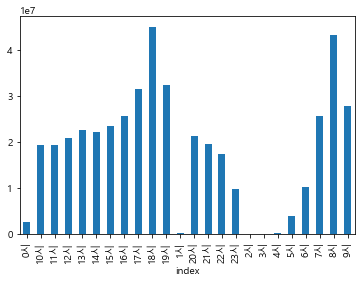

In [152]:
temp_df4.plot(kind='bar')